In [1]:
import pandas as pd
from collections import Counter
import json
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
df = pd.read_csv("vehicles.csv", sep=',',chunksize=1000,low_memory=False)
results = []
regions_distincts=[]
for i, chunk in enumerate(df):
    chunk.year=chunk.year.astype(str).str.replace(".0","",regex=False)
    regions_distincts.append(chunk.region)
    results.append(chunk)
new_df = pd.concat(results)
new_regions = [pd.Series(df).values.tolist()  for df in regions_distincts]
flat_list = [item for sublist in new_regions for item in sublist]
total_distinct_regions = len(set(flat_list))
records_by_region = Counter(flat_list)

In [2]:
with open('respuestas.txt', 'w') as f:
  f.write(f" 2 EL TOTAL DE REGIONES DISTINTAS ES: {total_distinct_regions}")
  f.write("\n")
  f.write("LOS REGISTROS POR REGION SON:")
  f.write("\n")
  json.dump(records_by_region, f, ensure_ascii=False)

In [3]:
new_df = new_df.dropna(axis=1, how='all').dropna()
new_df.to_csv("results.csv")
rslt_df = new_df.loc[(new_df.price>=15000) & ((new_df.condition=="excellent") | (new_df.condition=="good")) ]
rslt_df = rslt_df.loc[(rslt_df.paint_color =="blue" ) & ((rslt_df.manufacturer=="chevrolet")) ]

In [4]:
records_by_after_analysis = []
for i , j in rslt_df.iterrows():
    records_by_after_analysis.append(j["region"])
   

In [5]:
total_distinct_regions = set(records_by_after_analysis)
records_by_region = Counter(records_by_after_analysis)

In [6]:
new_records = {}

In [7]:
for elemento in total_distinct_regions:
    if elemento in new_records:
        pass
    else:
        new_records[elemento] = []

In [8]:
for i , j in rslt_df.iterrows():
    if j["region"] in new_records:
        new_records[j["region"]].append((j["long"],j["lat"]))

In [9]:
geometry = []
tags = []
for key ,value in new_records.items():
    if len(value)> 0:
        for coordinates in value:
            tags.append(key)
            geometry.append(Point(coordinates[0],coordinates[1]))

/home/sebas/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


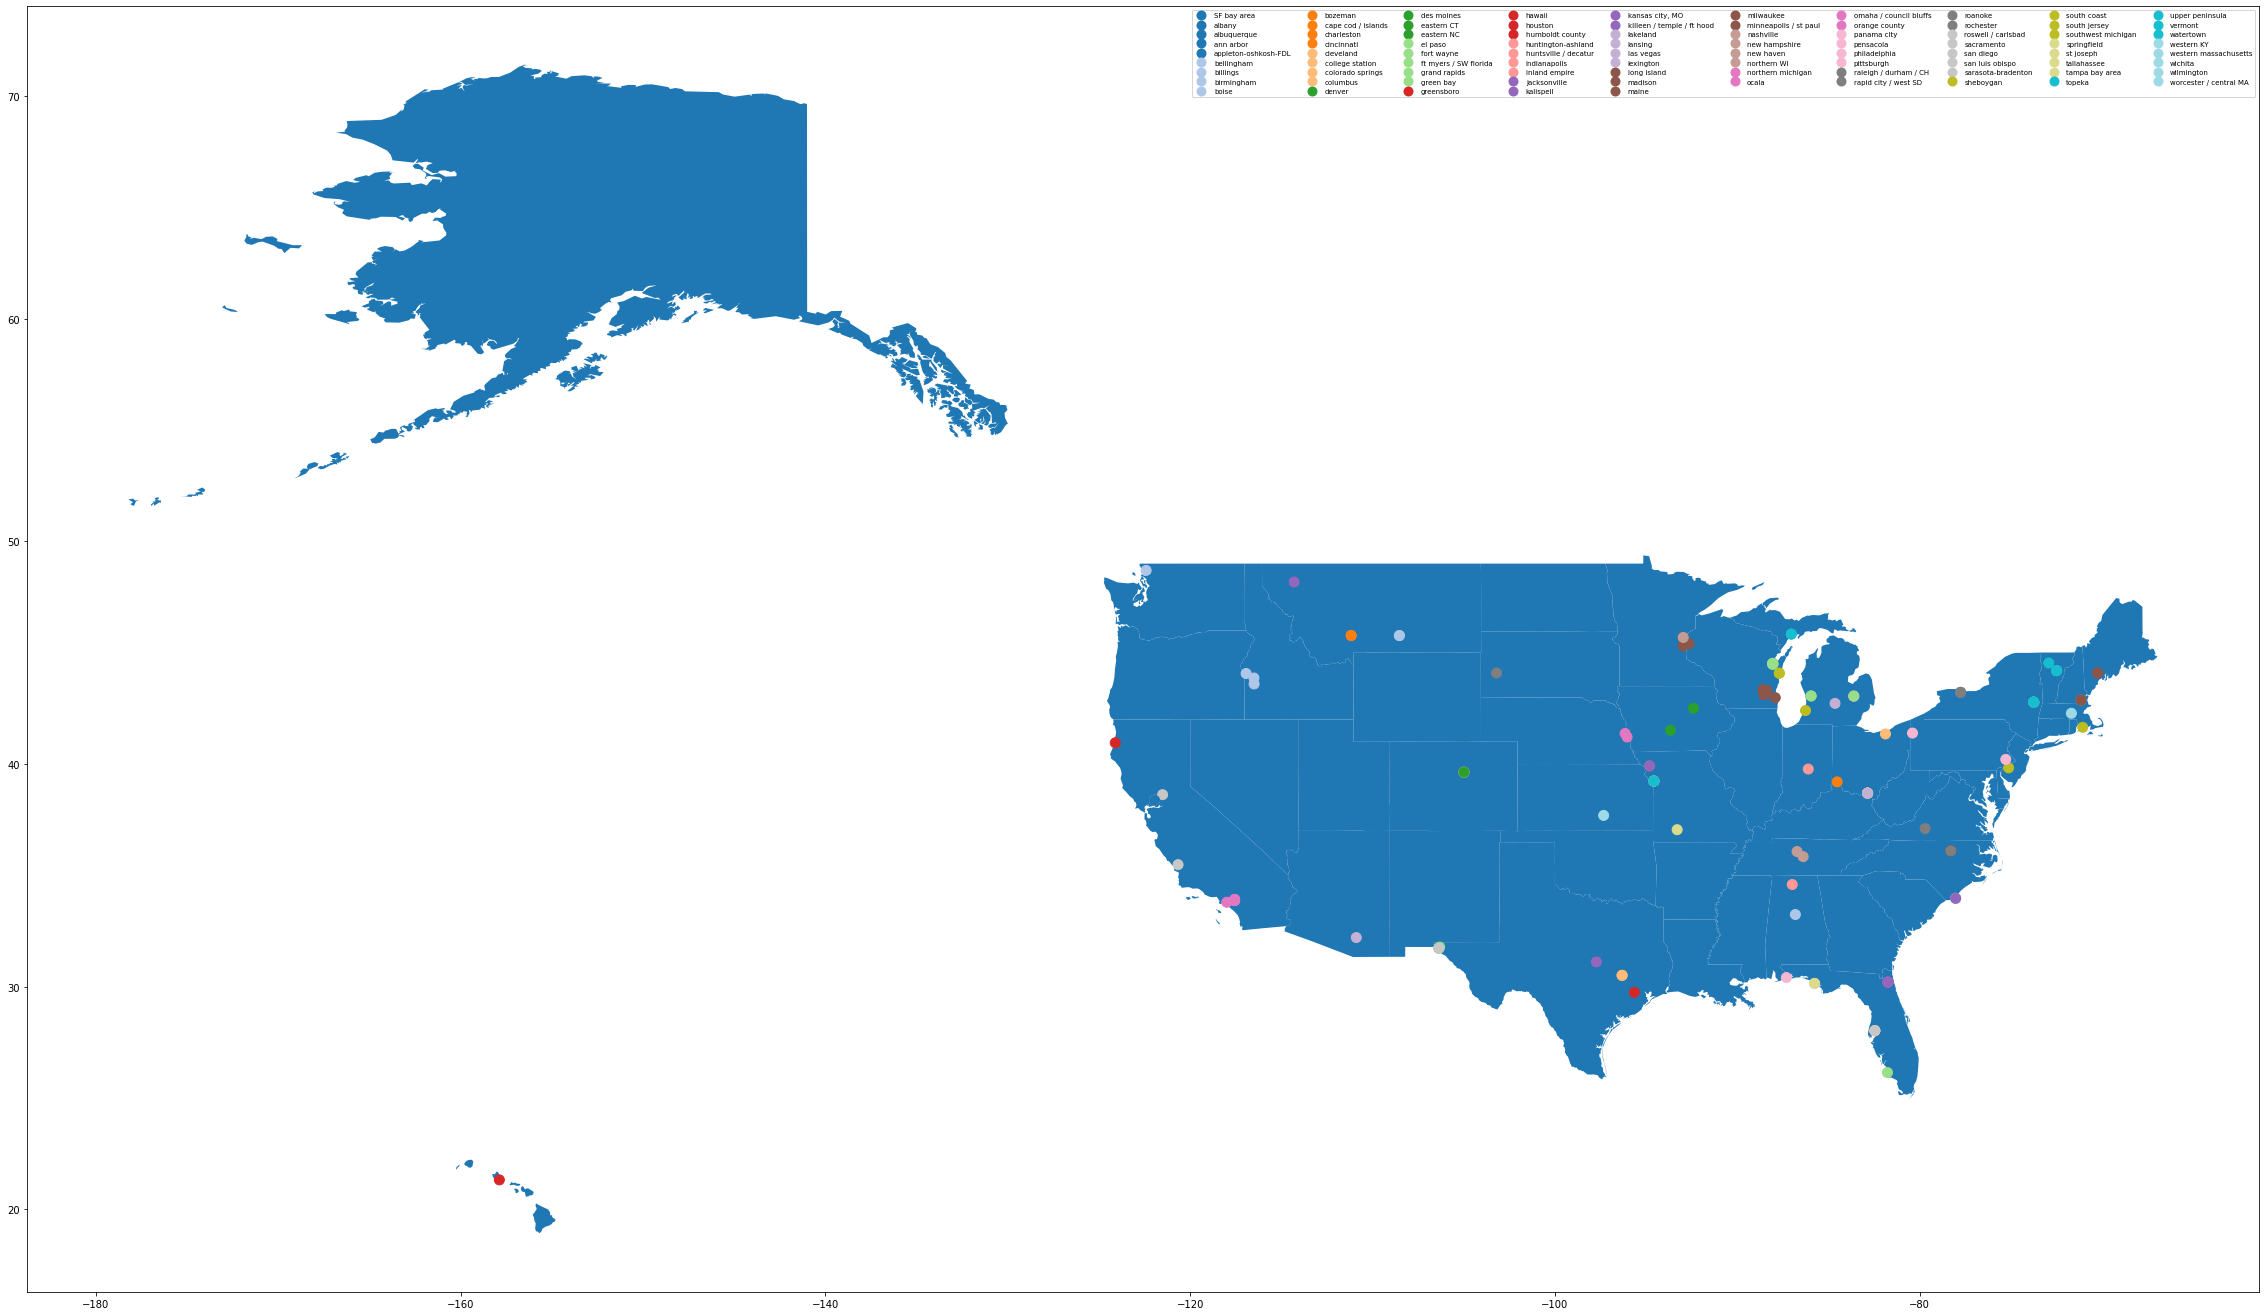

In [10]:
map_ = gpd.read_file("data/USA_States.shp")
geo_df_ = pd.DataFrame({"STATE_NAME":tags})
geo_df_ = GeoDataFrame(geo_df_,crs={"init":"epsg:4326"},geometry=geometry,) 
ax = map_.plot(figsize=(40, 30))
geo_df_ = geo_df_.plot( ax=ax, marker='o', column='STATE_NAME', categorical=True,
             markersize=100, legend=True, cmap='tab20',  legend_kwds={"ncol":10, "fontsize":"x-small"})

In [11]:
plt.savefig("map_final.pdf")

<Figure size 432x288 with 0 Axes>